# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
#from splinter import Browser
#from bs4 import BeautifulSoup
#import matplotlib.pyplot as plt
#import pandas as pd

#We learned selenium in class so changed imports to selenium and set up to selenium 

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#browser = Browser('chrome')

In [4]:
executable_path = {'executable_path': ChromeDriverManager().install()}
print(executable_path)


{'executable_path': 'C:\\Users\\enc308\\.wdm\\drivers\\chromedriver\\win64\\119.0.6045.105\\chromedriver-win32/chromedriver.exe'}


In [5]:
service = Service(executable_path = executable_path['executable_path'])
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
#url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
#browser.visit(url)

In [7]:
# Set the URL to visit to a variable
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

# Send the browser to the URL
driver.get(url)

# Save the HTML from the browser
html = driver.page_source

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')


In [9]:
# Extract all rows of data
table_rows = soup.find_all('tr', class_='data-row')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Create an empty list
mars_temp_data = []

# Loop through the scraped data to create a list of rows .getText()
for row in table_rows: 
    row_data = row.find_all('td')

    id = row_data[0].text
    terrestrial_date = row_data[1].text
    sol = row_data[2].text
    ls = row_data[3].text
    month = row_data[4].text
    min_temp = row_data[5].text
    pressure = row_data[6].text

# Create a Pandas DataFrame by using the list of rows and a list of the column names
    row_dict = {
        'id': id,
        'terrestrial_date': terrestrial_date,
        'sol': sol,
        'ls': ls,
        'month': month,
        'min_temp': min_temp, 
        'pressure': pressure
    }
        
        # Append the news dict to the mars temp list
    mars_temp_data.append(row_dict)

# Create a Pandas DataFrame 
mars_df = pd.DataFrame(mars_temp_data)

In [11]:
# Confirm DataFrame was created successfully
mars_df.head(5)


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [13]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype('int')
mars_df['ls'] = mars_df['ls'].astype('int')
mars_df['month'] = mars_df['month'].astype('int')
mars_df['min_temp'] = mars_df['min_temp'].astype('float')
mars_df['pressure'] = mars_df['pressure'].astype('float')

In [14]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.3+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
mars_months = mars_df['month'].value_counts().sort_index()
unique_mars_months = mars_df['month'].nunique()

print(mars_months, unique_mars_months)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64 12


In [16]:
# 2. How many Martian days' worth of data are there?
unique_mars_days = mars_df['terrestrial_date'].nunique()

unique_mars_days

1867

In [17]:
# 3. What is the average low temperature by month?
mars_months_avg_lowtemp = mars_df.groupby('month')['min_temp'].mean().sort_index()

mars_months_avg_lowtemp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

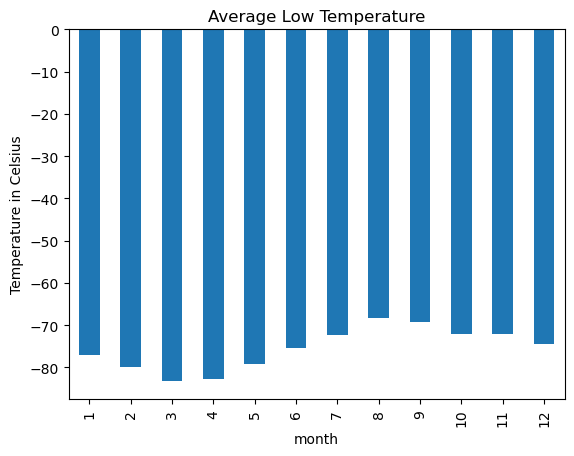

In [18]:
# Plot the average temperature by month
mars_months_avg_lowtemp.plot(kind='bar', xlabel='month', ylabel='Temperature in Celsius', title='Average Low Temperature')
print();

In [19]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = mars_months_avg_lowtemp.loc[mars_months_avg_lowtemp == mars_months_avg_lowtemp.min()].index[0]
hottest_month = mars_months_avg_lowtemp.loc[mars_months_avg_lowtemp == mars_months_avg_lowtemp.max()].index[0]

print(f"The coldest month is {coldest_month}.")
print(f"The hottest month is {hottest_month}.")

The coldest month is 3.
The hottest month is 8.


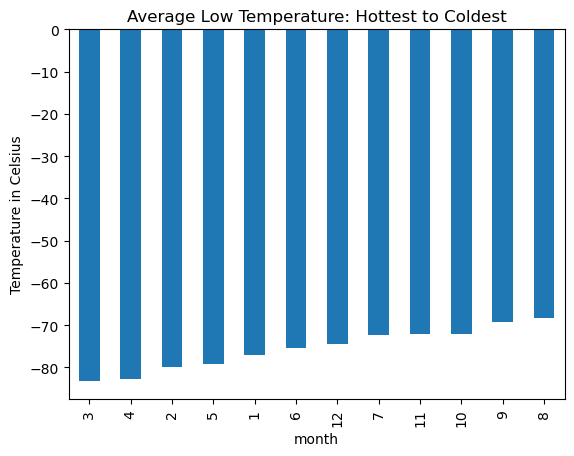

In [20]:
#Graph hottest to coldest (wasn't asked for, but the homework showed this graph)
#First order the months by hottest to coldest, then graph 

ordered_months = mars_months_avg_lowtemp.sort_values(ascending=True)
ordered_months.plot(kind='bar', xlabel='month', ylabel='Temperature in Celsius', title='Average Low Temperature: Hottest to Coldest')
print();

In [21]:
# 4. Average pressure by Martian month
mars_months_avg_pressure = mars_df.groupby('month')['pressure'].mean().sort_index()

mars_months_avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

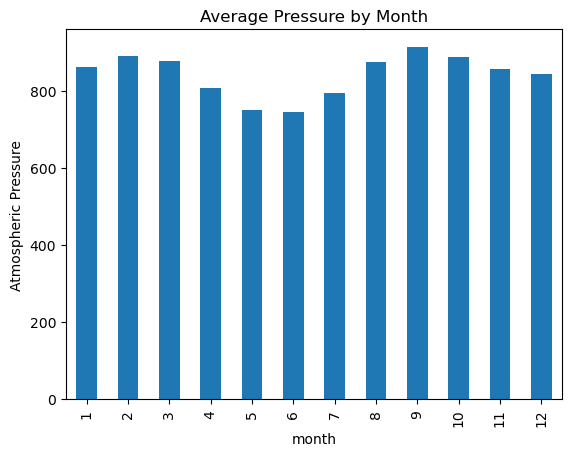

In [22]:
# Plot the average pressure by month
mars_months_avg_pressure.plot(kind='bar', xlabel='month', ylabel='Atmospheric Pressure', title='Average Pressure by Month')
print();

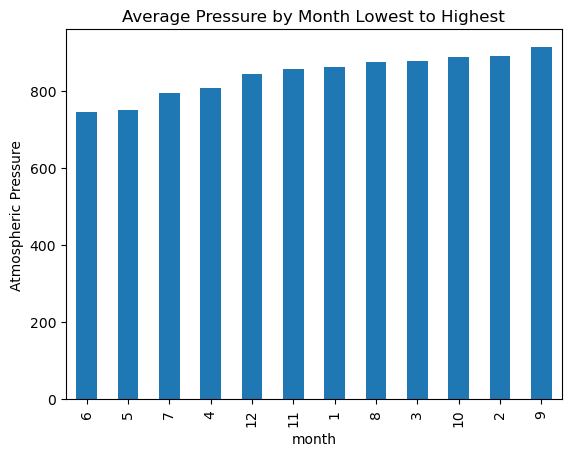

In [23]:
#Wasnt asked for, but the started code showed a graph doing descending ordre of average pressure
ordered_pressure = mars_months_avg_pressure.sort_values(ascending=True)
ordered_pressure.plot(kind='bar', xlabel='month', ylabel='Atmospheric Pressure', title='Average Pressure by Month Lowest to Highest')
print();

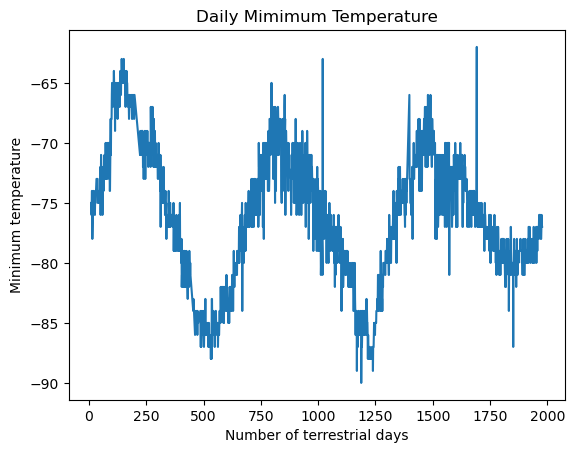

In [24]:
# 5. How many terrestrial (earth) days are there in a Martian year? - hw hint gives to plot the daily min temp
#sol is the terrestial days, min_temp gives daily min temperature 

plt.plot(mars_df['sol'], mars_df['min_temp'])
plt.title('Daily Mimimum Temperature')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show();

#Visually estimate the result

Reviewing the graph from plotting the daily minimum temperature on Mars, it looks like there is a peak around 750 and then the next one around 1425. Since the temperatures were tracked via Earth days, this means that there are 1425 - 750 Earth days per each Mars year, which is 675 days. 

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

In [25]:
#Visually estimate the number of days in Martian year
#From looking at the graph: The temperature was taken on Earth days so we will count one temperature per each day and graph it. Since years normally do a cycle of weather pattern, we will look at the peaks and determine how many days are between the peaks
#From the graph and the information given, it seems that one peak is around 750 and another around 1425. To find the number of days in the martian year I will find the difference 

martian_days = 1425 - 750
martian_days


675

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV
mars_df.to_csv('mars_data')

In [27]:
driver.quit()